In [68]:
import seaborn as sns

In [69]:
import matplotlib.pyplot as plt

In [70]:
import pandas as pd

# Ejercicio 1
Descarga el dataset adjunto precio alquiler por trimestre y barri.csv  extraído de la web OpenDataBCN y resume estadísticamente y gráficamente.

Crea al menos una visualización para:

1. Una variable categórica (Distrito o Barrio)
2. Una variable numérica (Precio)
3. Una variable numérica y una categórica (Distrito y Precio)
4. Dos variables numéricas (Año o Trimestre y Precio)
5. Tres variables (Barrio o Distrito, Trimestre y Precio)

In [71]:
alquiler = pd.read_csv("preu lloguer per trimestre i barri.csv")

In [72]:
alquiler

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


In [73]:
alquiler.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri
count,584.0,584.000000,584.000000,584.000000
mean,2021.0,2.500000,6.246575,37.000000
std,0.0,1.118992,2.790726,21.089371
min,2021.0,1.000000,1.000000,1.000000
25%,2021.0,1.750000,4.000000,19.000000
50%,2021.0,2.500000,7.000000,37.000000
75%,2021.0,3.250000,8.000000,55.000000
max,2021.0,4.000000,10.000000,73.000000


In [74]:
alquiler[alquiler['Preu'].isnull()]

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu


In [75]:
alquiler[alquiler['Nom_Barri'].isnull()]

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu


In [76]:
alquiler[alquiler['Nom_Districte'].isnull()]

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu


In [77]:
alquiler[alquiler['Lloguer_mitja'].isnull()]

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu


In [78]:
set(alquiler['Preu'])

{'--',
 '10.0',
 '10.1',
 '10.2',
 '10.4',
 '10.7',
 '10.8',
 '10.9',
 '1004.7',
 '1009.5',
 '1017.0',
 '1024.4',
 '1040.2',
 '1040.7',
 '1052.8',
 '1070.1',
 '1072.9',
 '1074.7',
 '11.0',
 '11.1',
 '11.2',
 '11.3',
 '11.4',
 '11.5',
 '11.6',
 '11.7',
 '11.8',
 '11.9',
 '1114.9',
 '1159.6',
 '1162.9',
 '1168.4',
 '1176.7',
 '1196.3',
 '12.0',
 '12.1',
 '12.2',
 '12.3',
 '12.4',
 '12.5',
 '12.6',
 '12.7',
 '12.8',
 '12.9',
 '1205.3',
 '1214.5',
 '1219.6',
 '1220.8',
 '1226.1',
 '1248.6',
 '1263.9',
 '1264.8',
 '1292.9',
 '1294.9',
 '1298.0',
 '1298.9',
 '13.0',
 '13.1',
 '13.2',
 '13.3',
 '13.4',
 '13.5',
 '13.6',
 '13.7',
 '13.8',
 '13.9',
 '1339.1',
 '1343.1',
 '1345.2',
 '1352.5',
 '1364.7',
 '14.0',
 '14.1',
 '14.2',
 '14.3',
 '14.5',
 '14.6',
 '14.7',
 '14.8',
 '14.9',
 '1429.0',
 '1433.7',
 '15.0',
 '15.1',
 '15.2',
 '15.3',
 '15.4',
 '15.5',
 '15.6',
 '15.7',
 '15.8',
 '15.9',
 '1531.7',
 '1566.5',
 '1578.0',
 '1597.4',
 '1598.2',
 '16.0',
 '16.1',
 '16.2',
 '16.3',
 '16.4',
 '16

Lo primero que checo son los 'null' de todos pero los de Preu, Lloguer_mitja, Nom_Barri y Nom_Districte por separado porque no son númericos y no lo puedo checar con 'describe'. Tambien reviso en 'preu' si hay datos no númericos ya que a veces llenan algunos lugares con algo para marcar que es 'null' y vemos que sí, en este caso '--'

In [79]:
alquiler[alquiler['Preu'] == '--'].sort_values(by='Codi_Barri')

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
11,2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),--
376,2021,3,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà per superfície (Euros/m2 mes),--
303,2021,3,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),--
230,2021,2,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà per superfície (Euros/m2 mes),--
157,2021,2,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),--
522,2021,4,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà per superfície (Euros/m2 mes),--
449,2021,4,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),--
84,2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà per superfície (Euros/m2 mes),--
114,2021,1,7,Horta-Guinardó,42,la Clota,Lloguer mitjà per superfície (Euros/m2 mes),--
406,2021,3,7,Horta-Guinardó,42,la Clota,Lloguer mitjà per superfície (Euros/m2 mes),--


In [80]:
alquiler[alquiler['Nom_Barri'] == 'la Marina del Prat Vermell']

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
11,2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),--
84,2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà per superfície (Euros/m2 mes),--
157,2021,2,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),--
230,2021,2,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà per superfície (Euros/m2 mes),--
303,2021,3,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),--
376,2021,3,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà per superfície (Euros/m2 mes),--
449,2021,4,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),--
522,2021,4,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà per superfície (Euros/m2 mes),--


In [81]:
alquiler['Preu'] = pd.to_numeric(alquiler['Preu'], errors='coerce')

In [82]:
alquiler = alquiler.dropna()

In [83]:
alquiler.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,540.0,540.000000,540.000000,540.000000,540.000000
mean,2021.0,2.503704,6.185185,36.459259,442.157222
std,0.0,1.119065,2.839387,21.371096,457.358745
min,2021.0,1.000000,1.000000,1.000000,6.700000
25%,2021.0,2.000000,3.000000,18.000000,12.775000
50%,2021.0,2.500000,7.000000,35.000000,232.750000
75%,2021.0,4.000000,8.000000,55.000000,815.875000
max,2021.0,4.000000,10.000000,73.000000,1816.500000


Ahora checamos de donde vienen los 'null' y vemos que provienen de ciertos Barrios, ahora lo que normalmente lo que haría es consultar por los datos faltantes, pero eso no es una en este caso, y como no puedo asumir su valor lo mejor sera eliminarlos para interfieran con nuestras gráficas. Tambien aprobecho para convertir 'Preu' a una variable númerica.

In [84]:
set(alquiler['Lloguer_mitja'])

{'Lloguer mitjà mensual (Euros/mes)',
 'Lloguer mitjà per superfície (Euros/m2 mes)'}

In [85]:
alquiler[alquiler['Nom_Barri'] == 'el Raval']

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
73,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.8
146,2021,2,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),774.2
219,2021,2,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.9
292,2021,3,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),770.5
365,2021,3,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.9
438,2021,4,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),772.8
511,2021,4,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),13.1


In [86]:
Aquiler = (alquiler[alquiler['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)']).sort_values(by='Preu')

In [87]:
Aquiler.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,270.0,270.000000,270.000000,270.000000,270.000000
mean,2021.0,2.503704,6.185185,36.459259,12.720741
std,0.0,1.120104,2.842024,21.390949,1.701480
min,2021.0,1.000000,1.000000,1.000000,6.700000
25%,2021.0,2.000000,3.250000,18.250000,11.625000
50%,2021.0,2.500000,7.000000,35.000000,12.750000
75%,2021.0,3.750000,8.000000,55.000000,13.600000
max,2021.0,4.000000,10.000000,73.000000,18.000000


Antes de proceguir con los ejercicios decidi checar la columna Lloguer_mitja (Alquiler medio) y pude ver que hay dos datos que miden el mismo alquiler pero de distinta manera esto se puede confirmar en la tabla que creo justo despues donde los datos de trimestre se repiten para hablarnos de dos distintas maneras en la que se cobra el alquiler. Por lo creo una variable que solo incluya el alquiler por superficie.

## Variable categórica

In [88]:
trimestres_a_eliminar = [2, 3, 4]
prueba = Aquiler[~Aquiler['Trimestre'].isin(trimestres_a_eliminar)]

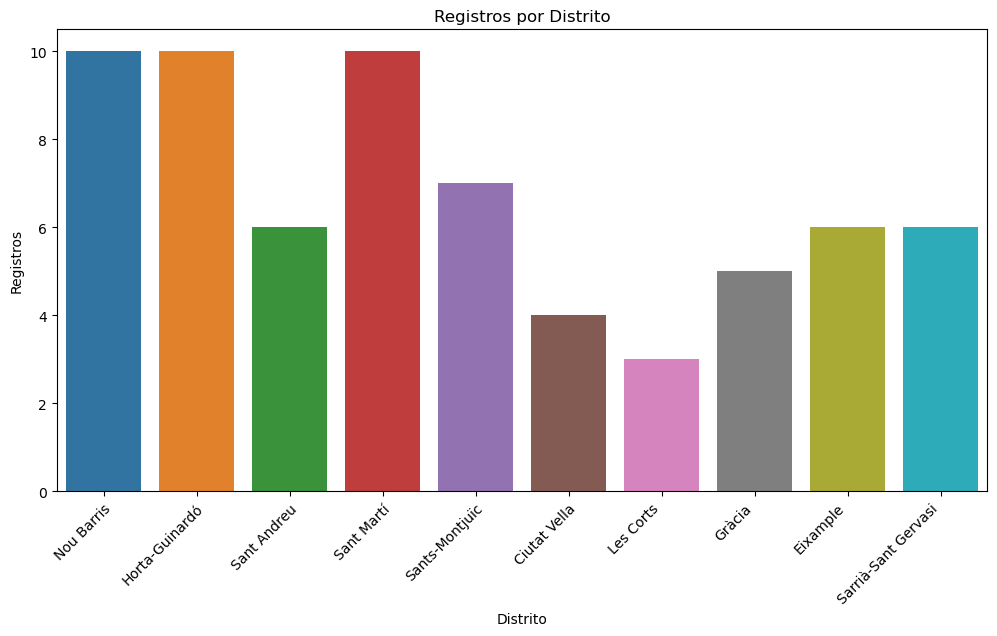

In [89]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
sns.countplot(x='Nom_Districte', data=prueba)
plt.xlabel("Distrito")
plt.ylabel('Registros')
plt.title('Registros por Distrito')
plt.show()

Esta grafica examina, con countplot, el número de registros que hay en distintos distritos. Para este caso elimine los trimestres 2, 3 y 4 ya que estos son datos repetidos, al menos en este caso en particular.

Vemos que 'Nou Barris, 'Horta-Guinardó' y 'Sant Martí' son aquellos que más registros llevan con 10. Mientras que Les Corts Gràcia y Ciutat Vella son los que menos tienen con la mitad o menos en comparación con los que más tienen. Y los demas tienen 6 o 7.

## Variable Númerica

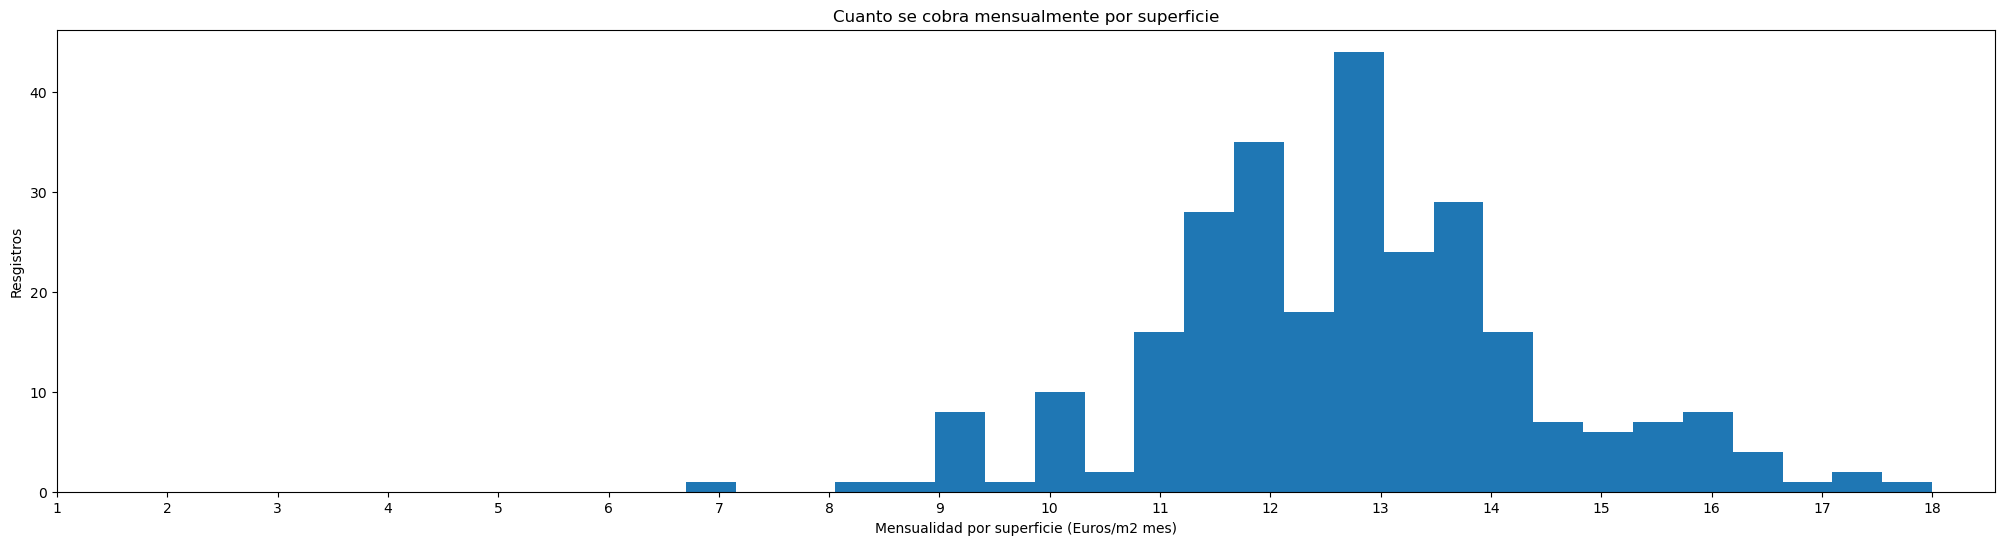

In [90]:
plt.figure(figsize=(25, 6))
plt.hist(Aquiler['Preu'], bins=25)
plt.xlabel("Mensualidad por superficie (Euros/m2 mes)")
plt.ylabel('Resgistros')
plt.xticks(range(1, 19), labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18'])
plt.title('Cuanto se cobra mensualmente por superficie')
plt.savefig('Histograma.png', dpi=300, bbox_inches='tight')
plt.show()

Esta grafica muestra una cantidad aproximada de los precios de cada mensualidad.
Lo más notorio en este histograma es que generalmente cobran entre 11-14 Euros/m2 mes.

## Una variable numérica y una categórica

Preguntar a la maestra si Transformar Preu a float esta bien

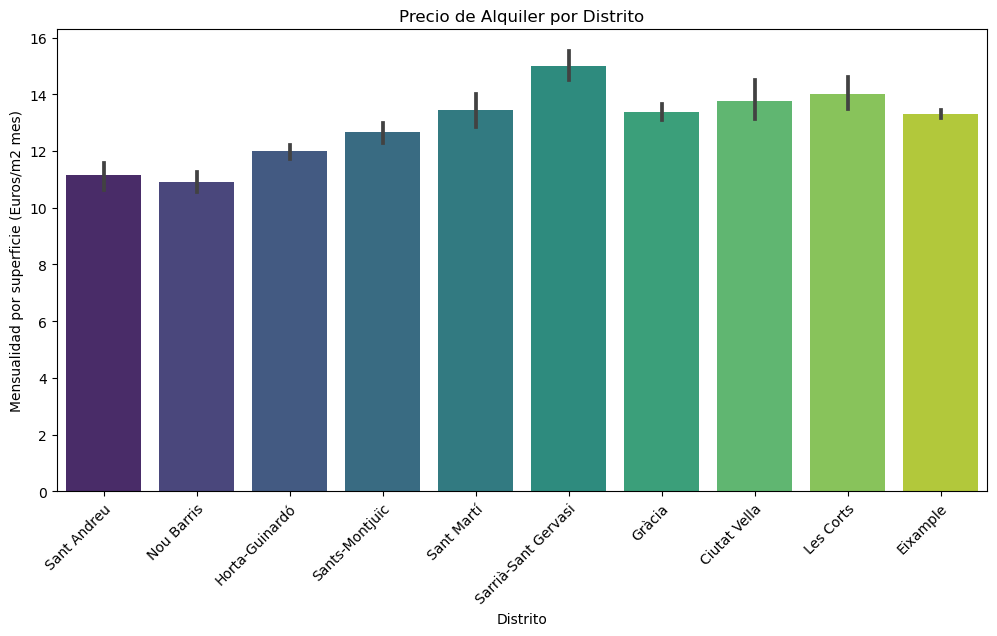

In [91]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Nom_Districte', y='Preu', data=Aquiler, palette='viridis')
plt.xlabel('Distrito')
plt.ylabel('Mensualidad por superficie (Euros/m2 mes)')
plt.title('Precio de Alquiler por Distrito')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('GraficoBarra.png', dpi=300, bbox_inches='tight')
plt.show()

Aquí vemos la mensualidad por superficie en cada distrito. Las líneas de error, muestran la variabilidad de los datos y dan una idea general de lo precisa que es una medición. Así tenemos que Horta-Guinardó y Eixample son más precisas que Nou Barris, y siendo Ciutat Vella es la menos precisa de todas.

Así terminamos viendo como Sarrià-Sant Gervasi y Les Corts son las zonas más caras, mientras Nou Barris y Sant Andreu son los más baratos.

## 2 variables númericas

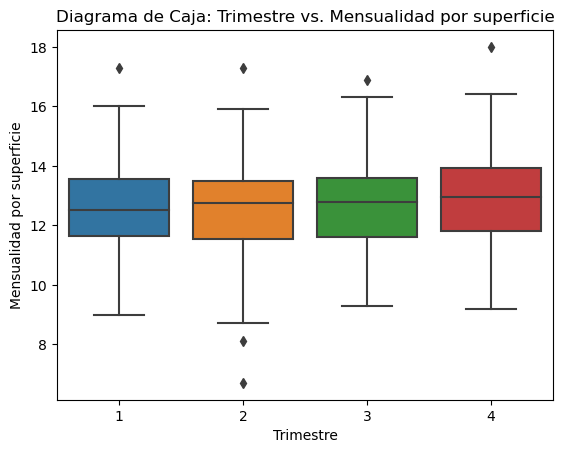

In [92]:
sns.boxplot(x='Trimestre', y='Preu', data=Aquiler)
plt.xlabel('Trimestre')
plt.ylabel('Mensualidad por superficie')
plt.title('Diagrama de Caja: Trimestre vs. Mensualidad por superficie')
plt.savefig('DigramaCaja.png', dpi=300, bbox_inches='tight')
plt.show()

En este diagrama donde comparamos la mensualidad con los 4 trimestres, las cajas muestran la mitad de los datos, las lineas la otra mitad y la linea dentro de la caja muestra la mediana de los datos.

La maxima conclusión que se puede ver es que para el cuarto trimestre hubo un aumento en la renta por superficie y durante el segundo trimestre hubo la mayor cantidad de valores atípicos (los puntos).

## 3 variables

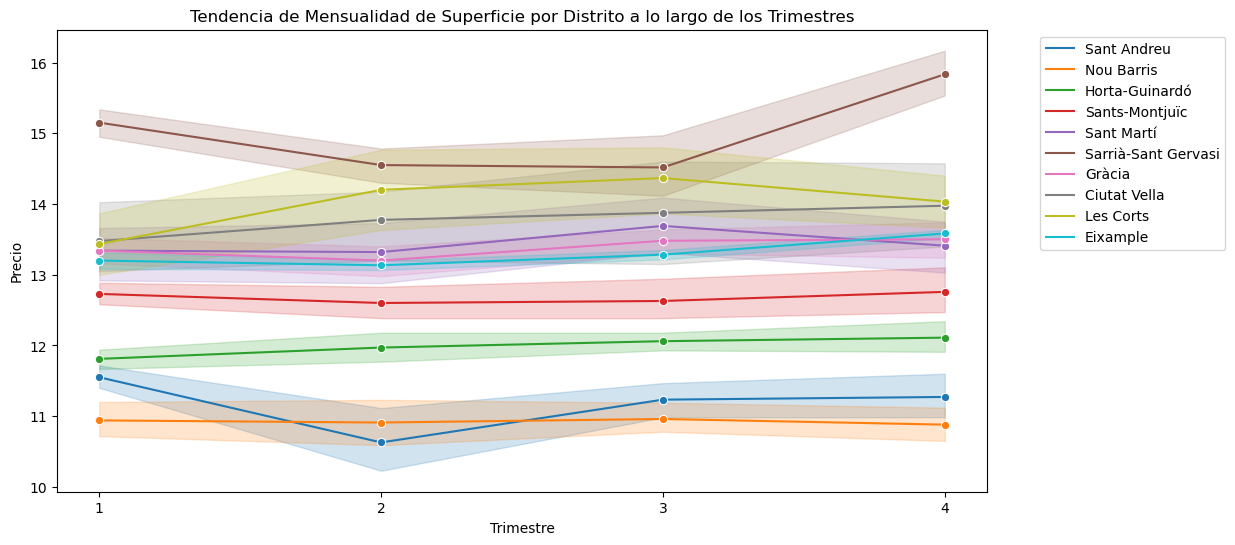

In [95]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Trimestre', y='Preu', hue='Nom_Districte', marker='o', data=Aquiler, errorbar = ('ci', 50))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(1, 5), labels=['1', '2', '3', '4'])
plt.ylabel('Precio')
plt.title('Tendencia de Mensualidad de Superficie por Distrito a lo largo de los Trimestres')
plt.savefig('lineplot.png', dpi=300, bbox_inches='tight')
plt.show()

Vemos un grafico donde precio, trimestre y distrito son identificables. 

Podemos ver, que ciertos Distritos mantienen un precio similar durante todos los trimestres, como 'Ciutat Vella', 'Sants-Montjuïc', entre otros; mientras en otros hay cambios constantes en la renta como en 'Sant Andreu' o 'Sarrià-Sant Gervasi'. 

Al observar los distritos 'Les Corts', 'Ciutat Vella', 'Gràcia', 'Sant Martí' y 'Eixample' empiezan con precios muy similares, pero con el tiempo 'Les Corts' y 'Ciutat Vella' fueron aumentando su precio en comparación con las otras tres, que mantuvieron precios similares casi todo el año.

La sombra que vemos en cada linea es el intervalo de confianza que tiene cada linea, esto quiere decir, la sombra nos indica donde se encuentra el valor real de la variable. Dicho eso, podemos ver como en distritos como 'Horta-Guinardo'o 'Nou Barris' tienen un intervalo de confianza menor a 'Les Corts' o 'Ciutat Vella'. Tambien vemos como el intervalo aumenta o se reduce conforme al trimestre, como en 'Sants-Montjuïc' donde aumenta el intervalo progresivo.

# Ejercicio 2
Exporta los gráficos como imágenes o HTML.

Para esta actividad coloque el codigo en el mismo codigo donde lo cree para ahorrarme espacio.

# Ejercicio 3
Propone alguna visualización que creas que puede resultar interesante.

In [21]:
propuesta = (Aquiler[Aquiler['Nom_Districte'] == 'Sant Martí'])

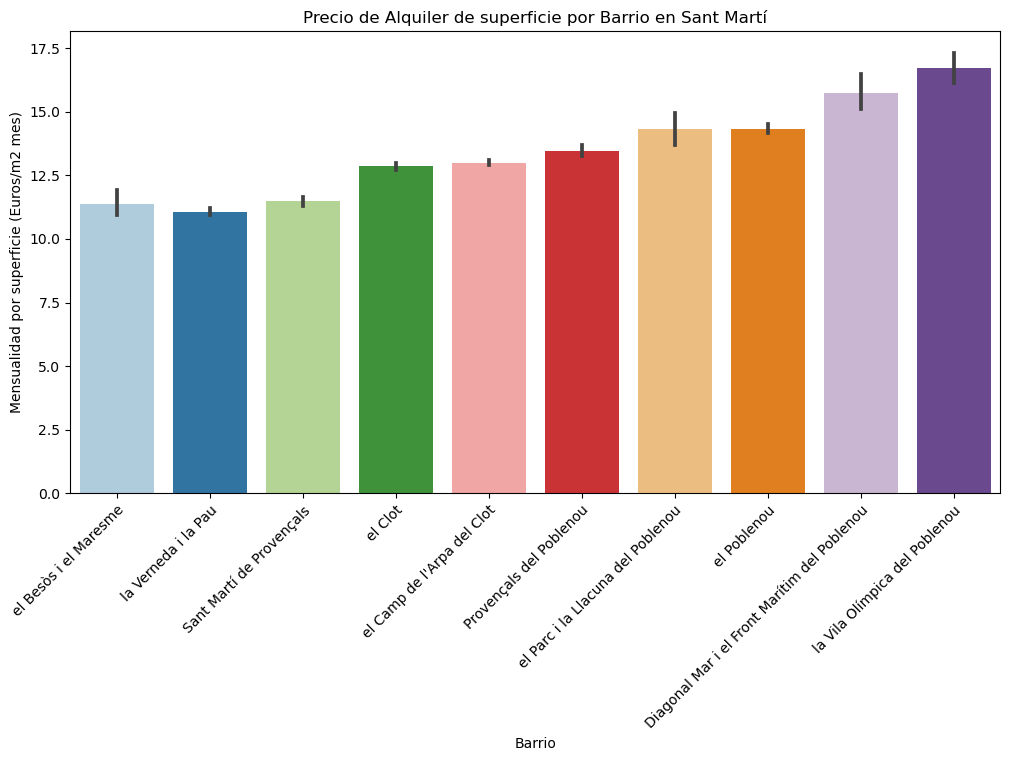

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Nom_Barri', y='Preu', data=propuesta, palette='Paired')
plt.xlabel('Barrio')
plt.ylabel('Mensualidad por superficie (Euros/m2 mes)')
plt.title('Precio de Alquiler de superficie por Barrio en Sant Martí')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

Esta grafica de barras toma el alquiler por superficie por Barrio exclusivamente del distrito de Sant Martí

Considero que esta es una gráfica útil cuando queremos saber que barrios de distritos especificos son más baratos o caros. Tambien podriamos hacer una super gráfica de todos los barrios pero entonces seria muy díficil encontrar datos de un barrio especifico.

'la Vila Olímpica del Poblenou' y 'Diagonal Mar i el Front Marítim del Poblenou' son los barrios más caros mientras que 'la Verneda i la Pau' y 'Sant Martí de Proveçals' son los más baratos.

Otra cosa notoria es que la mayoria de los barrios tienen una líneas de error bastante cortas, con solo cuatro ('el Besòs i el Marasme', 'el Parc i la Llacuna del Poblenou', 'la Vila Olímpica del Poblenou' y 'Diagonal Mar i el Front Marítim del Poblenou') tienen líneas de error bastante largas.